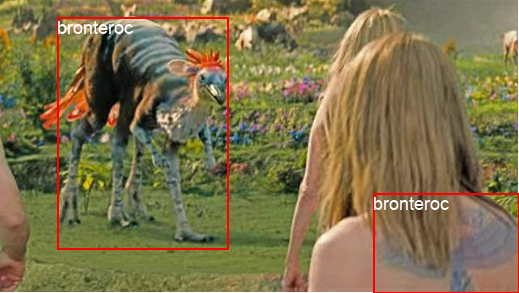

In [17]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont

def draw_bb(img, bbox, conf, labels, threshold=0.5):
    W, H = img.size
    overlay = ImageDraw.Draw(img)
    font = ImageFont.truetype('/Library/Fonts/Arial.ttf', 18)

    for i in range(len(conf)):
        if conf[i] <= threshold:
            continue
        x,y,w,h = bbox[i] * np.array([W, H, W, H])
        overlay.rectangle([x,y,x+w,y+h], outline ="red", fill=None,width=2)
        overlay.text((x, y), labels[i], (255,255,255), font=font)
    return img

n = 3
vocab = ["dog", "cat", "elephant", "bird", "bronteroc"]
y = [float(s) for s in "0.20 0.23 0.47 0.51 0.34 0.11 0.06 0.33 0.79 0.89 0.72 0.66 0.28 0.34 0.61 0.13 0.04 0.21 0.23 0.39".split()]
bbox_with_conf, probs = np.array(y[:15]).reshape(n, -1), np.array(y[15:])
bbox, conf = bbox_with_conf[:, :-1], bbox_with_conf[:, -1:]
label = vocab[np.argmax(probs)]
img = Image.open("./q3-image.png")
draw_bb(img, bbox, conf, [label]*n, threshold=0.6)
img

In [6]:
font = ImageFont.load_default(fontsize=12)


TypeError: load_default() got an unexpected keyword argument 'fontsize'

In [8]:
ImageFont.load_default?

Signature: ImageFont.load_default()
Docstring:
Load a "better than nothing" default font.

.. versionadded:: 1.1.4

:return: A font object.
File:      ~/miniconda3/envs/di504/lib/python3.9/site-packages/PIL/ImageFont.py
Type:      function


In [10]:
font = ImageFont.truetype('/Library/Fonts/Arial.ttf', 15)


In [13]:
ImageFont.truetype?

Signature:
ImageFont.truetype(
    font=None,
    size=10,
    index=0,
    encoding='',
    layout_engine=None,
)
Docstring:
Load a TrueType or OpenType font from a file or file-like object,
and create a font object.
This function loads a font object from the given file or file-like
object, and creates a font object for a font of the given size.

Pillow uses FreeType to open font files. If you are opening many fonts
simultaneously on Windows, be aware that Windows limits the number of files
that can be open in C at once to 512. If you approach that limit, an
``OSError`` may be thrown, reporting that FreeType "cannot open resource".

This function requires the _imagingft service.

:param font: A filename or file-like object containing a TrueType font.
             If the file is not found in this filename, the loader may also
             search in other directories, such as the :file:`fonts/`
             directory on Windows or :file:`/Library/Fonts/`,
             :file:`/System/Lib